# Setup 

 Basic stack for scientific computation uses numpy (for quick numerical computation). 
 Sympy is a symbolic math computation. 
 

In [2]:
# Import packages for a scientific environment
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import display

%matplotlib widget
print("numpy version = %s" % np.__version__)
print("sympy version = %s" % sp.__version__)

numpy version = 1.23.2
sympy version = 1.10.1


We define some default symbols that have common mathematical meaning. This includes 
- $x, y, z, t, u, v, w$ that are generic symbols;
- the greek letters $\alpha, \beta, \gamma, \delta, \lambda, \mu, \nu, \tau, \omega, \phi, \psi$ are also generic symbols (parameters);
- the parameters $k,l,m,n$ are integers
- $f,g,h$ stand for functions

This is inspired by Spyder's default for symbolic computation

In [3]:
x, y, z, t, u, v, w = sp.symbols("x y z t u v w")
α, β, γ, δ, λ, μ, ν, ρ, τ, ω, ϕ, ψ = sp.symbols("α β γ δ λ μ ν ρ τ ω ϕ ψ")
k, l, m, n = sp.symbols("k l m n", integer=True)
f, g, h = sp.symbols("f g h", cls=sp.Function)

To display multiple outputs from the same cell and pretty-print them use `display(expr)` 

In [4]:
Triangles2D = np.array([[[1, 1], [2, 2.5], [3, 1]], [[8, 7.5], [7, 9], [9, 9]]])
np.shape(Triangles2D)

(2, 3, 2)

We can iterate over the triangles in `Tris` using a for loop:

In [10]:
for triangle in Triangles2D:
    display(triangle)

array([[1. , 1. ],
       [2. , 2.5],
       [3. , 1. ]])

array([[8. , 7.5],
       [7. , 9. ],
       [9. , 9. ]])

Now let us implement a quick drawing routing that for each triangle plots the vertexes in red and the triangles in green

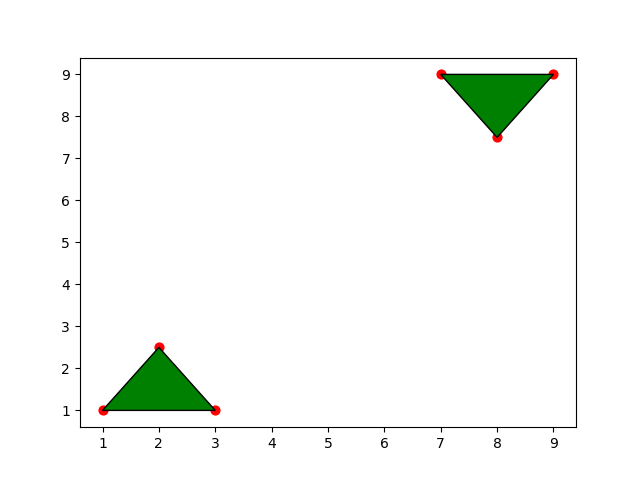

In [12]:
def plotTriangles2D(Triangles2D):
    plt.close()
    plt.figure()
    for triangle in Triangles2D:
        plt.scatter(triangle[:, 0], triangle[:, 1], s=40, color="red")
        tri_poly = plt.Polygon(triangle[:3, :], edgecolor="black", facecolor="green")
        plt.gca().add_patch(tri_poly)
    plt.show()


plotTriangles2D(Triangles2D)

# Projecting a 3D cube

In [6]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [7]:
CubeVert = np.array(
    [
        [0, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 1],
    ]
)

## A straight cube

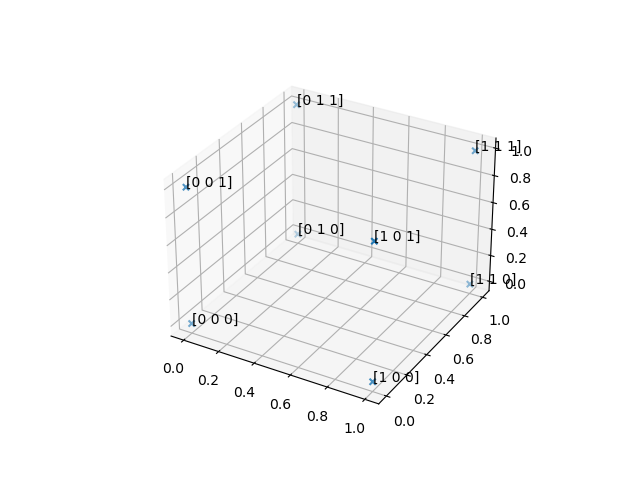

In [8]:
try:
    plt.close(fig)
except NameError:
    pass

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(CubeVert[:, 0], CubeVert[:, 1], CubeVert[:, 2], marker="x")

# ax.plot_trisurf(CubeVert[:,0], CubeVert[:,1], CubeVert[:,2], linewidth=0.2, antialiased=True)

for vert in CubeVert:
    ax.text(vert[0], vert[1], vert[2], str(vert))

In [10]:
edges = []
for i, vertex_i in enumerate(CubeVert):
    for j, vertex_j in enumerate(CubeVert):
        if i > j and np.linalg.norm(vertex_i - vertex_j) < 1.1:
            edges.append((i, j))
display(edges)

[(1, 0),
 (2, 0),
 (3, 1),
 (3, 2),
 (4, 0),
 (5, 1),
 (5, 4),
 (6, 2),
 (6, 4),
 (7, 3),
 (7, 5),
 (7, 6)]

In [11]:
lines = []
for i, j in edges:
    lines.append([CubeVert[i], CubeVert[j]])
# display(lines)
lc = Line3DCollection(lines, linewidths=1.5, colors="green")
ax.add_collection(lc);

## Defining rotation matrices

In [1]:
def XRotationMatrix(angle):
    return np.array(
        [
            [1, 0, 0],
            [0, np.cos(angle), -np.sin(angle)],
            [0, np.sin(angle), np.cos(angle)],
        ]
    )


def YRotationMatrix(angle):
    return np.array(
        [
            [np.cos(angle), 0, np.sin(angle)],
            [0, 1, 0],
            [-np.sin(angle), 0, np.cos(angle)],
        ]
    )


def ZRotationMatrix(angle):
    return np.array(
        [
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle), np.cos(angle), 0],
            [0, 0, 1],
        ]
    )


display(XRotationMatrix(1), YRotationMatrix(1), ZRotationMatrix(1))

NameError: name 'np' is not defined

In [13]:
def CreateRotationMatrix(xangle, yangle, zangle):
    return np.matmul(
        np.matmul(XRotationMatrix(xangle), YRotationMatrix(yangle)),
        ZRotationMatrix(zangle),
    )

In [15]:
RotationMatrix = CreateRotationMatrix(1, 2, 3)
display(RotationMatrix)

array([[ 0.41198225,  0.05872664,  0.90929743],
       [-0.68124272, -0.64287284,  0.35017549],
       [ 0.60512725, -0.76371834, -0.2248451 ]])

In [18]:
RotatedCubeVert = list()
for vert in CubeVert:
    # display(np.matmul(Rot, vert))
    RotatedCubeVert.append(np.matmul(RotationMatrix, vert))
RotatedCubeVert = np.array(RotatedCubeVert)
display(RotatedCubeVert)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.41198225, -0.68124272,  0.60512725],
       [ 0.05872664, -0.64287284, -0.76371834],
       [ 0.47070889, -1.32411556, -0.15859109],
       [ 0.90929743,  0.35017549, -0.2248451 ],
       [ 1.32127967, -0.33106723,  0.38028215],
       [ 0.96802407, -0.29269735, -0.98856343],
       [ 1.38000632, -0.97394007, -0.38343618]])

## Displaying a rotated cube

In [19]:
RotationMatrix = CreateRotationMatrix(1, 2, 3)
RotatedCubeVert = list()
for vertex in CubeVert:
    # display(np.matmul(Rot, vert))
    RotatedCubeVert.append(np.matmul(RotationMatrix, vertex))
RotatedCubeVert = np.array(RotatedCubeVert)

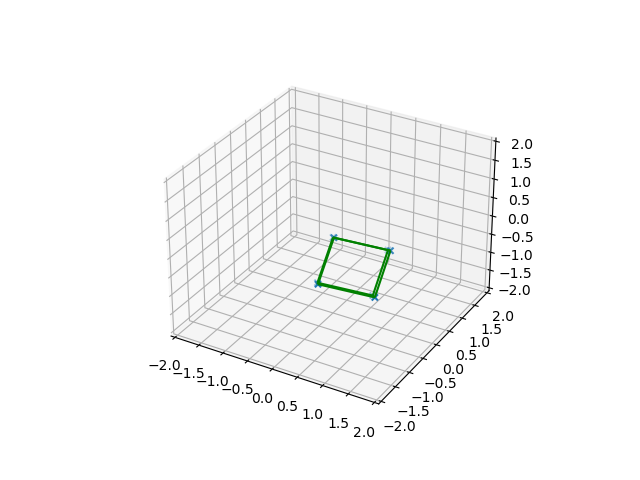

In [20]:
try:
    plt.close(fig2)
except NameError:
    pass

fig2 = plt.figure()
ax2 = fig2.add_subplot(projection="3d")
ax2.scatter(
    RotatedCubeVert[:, 0], RotatedCubeVert[:, 1], RotatedCubeVert[:, 2], marker="x"
)
ax2.set(xlim=(-2, 2), ylim=(-2, 2), zlim=(-2, 2))
ax2.set(frame_on=False)


lines = []
for i, j in edges:
    lines.append([RotatedCubeVert[i], RotatedCubeVert[j]])
lc = Line3DCollection(lines, linewidths=1.5, colors="green")
ax2.add_collection(lc)

## Projecting the rotated cube onto the $x,y$ plane

In [21]:
from matplotlib.collections import LineCollection

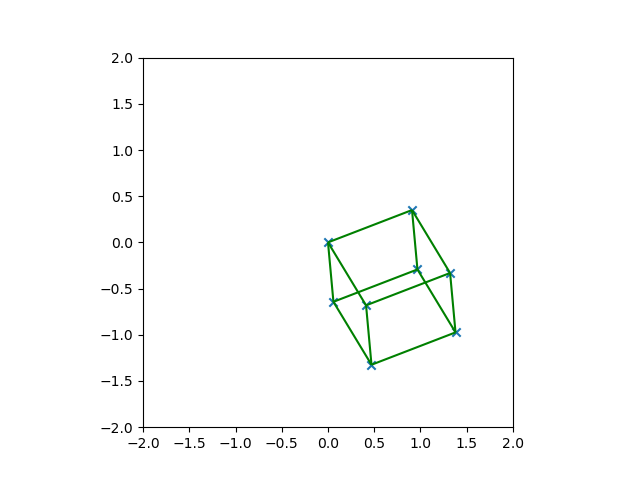

In [22]:
try:
    plt.close(fig3)
except NameError:
    pass

fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.set(xlim=(-2, 2), ylim=(-2, 2))
ax3.set(aspect=1)

ax3.scatter(RotatedCubeVert[:, 0], RotatedCubeVert[:, 1], marker="x")

lines = []
for i, j in edges:
    lines.append([RotatedCubeVert[i, 0:2], RotatedCubeVert[j, 0:2]])
# display(lines)

lc = LineCollection(lines, linewidths=1.5, colors="green")
ax3.add_collection(lc)

# Widgets

In [23]:
import ipywidgets as widgets

In [30]:
angle_x = widgets.FloatSlider(
    value=0,
    min=0,
    max=2 * np.pi,
    continuous_update=False,
    description="Angle around x axis",
    style=dict(description_width="initial"),
)
angle_y = widgets.FloatSlider(
    value=0,
    min=0,
    max=2 * np.pi,
    description="Angle around y axis",
    continuous_update=False,
    style=dict(description_width="initial"),
)

angle_z = widgets.FloatSlider(
    value=0,
    min=0,
    max=2 * np.pi,
    description="Angle around z axis",
    continuous_update=False,
    style=dict(description_width="initial"),
)

angles = widgets.VBox([angle_x, angle_y, angle_z])

display(angles)

In [31]:
output_RotationMatrix = widgets.Output()
with output_RotationMatrix:
    display("Rotation Matrix:")
    display(RotationMatrix)


def UpdateRotationMatrix(change):
    global RotationMatrix
    global angle_x
    global angle_y
    global angle_z
    RotationMatrix = CreateRotationMatrix(angle_x.value, angle_y.value, angle_z.value)
    with output_RotationMatrix:
        output_RotationMatrix.clear_output()
        display("Rotation Matrix:")
        display(RotationMatrix)


output_RotationMatrix

Output()

In [32]:
angle_x.observe(UpdateRotationMatrix, names="value")
angle_y.observe(UpdateRotationMatrix, names="value")
angle_z.observe(UpdateRotationMatrix, names="value")

In [33]:
try:
    plt.close(fig4)
except NameError:
    pass

plt.ioff()
fig4 = plt.figure()
ax4 = fig4.add_subplot(projection="3d")
plt.ion();

In [34]:
output_RotationMatrixPlot = widgets.Output()


def UpdateRotationMatrixPlot(change):
    with output_RotationMatrixPlot:
        ax4.cla()
        ax4.set(xlim=(-2, 2), ylim=(-2, 2), zlim=(-2, 2))
        lines = [
            [[0, 0, 0], RotationMatrix[:, 0]],
            [[0, 0, 0], RotationMatrix[:, 1]],
            [[0, 0, 0], RotationMatrix[:, 2]],
        ]
        lc = Line3DCollection(lines, linewidths=1.5, colors="green")
        ax4.add_collection(lc)

        output_RotationMatrixPlot.clear_output()
        print("Rotation Matrix Plot:")
        display(fig4)


UpdateRotationMatrixPlot(None)
output_RotationMatrixPlot

Output()

In [35]:
angle_x.observe(UpdateRotationMatrixPlot, names="value")
angle_y.observe(UpdateRotationMatrixPlot, names="value")
angle_z.observe(UpdateRotationMatrixPlot, names="value")

## Rotating cube with widgets

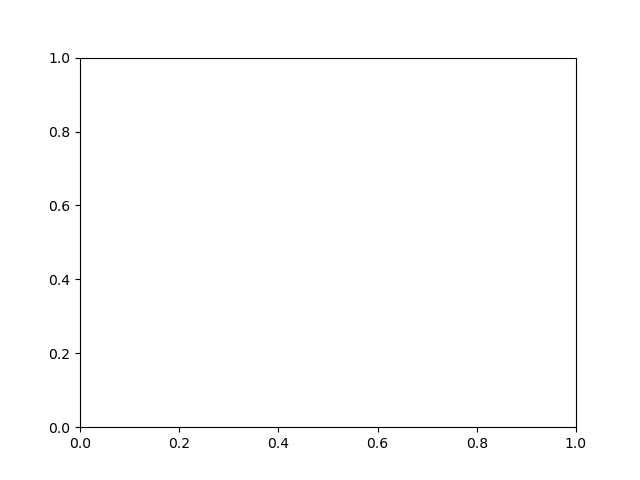

In [36]:
try:
    plt.close(fig5)
except NameError:
    pass

fig5 = plt.figure()
ax5 = fig5.add_subplot()

In [37]:
def UpdateRotatedCubePlot(change):
    ax5.cla()
    ax5.set(xlim=(-2, 2), ylim=(-2, 2))
    ax5.set(aspect=1)

    RotatedCubeVert = list()
    for vertex in CubeVert:
        # display(np.matmul(Rot, vert))
        RotatedCubeVert.append(np.matmul(RotationMatrix, vertex))
    RotatedCubeVert = np.array(RotatedCubeVert)

    ax5.scatter(RotatedCubeVert[:, 0], RotatedCubeVert[:, 1], marker="x")

    lines = []
    for i, j in edges:
        lines.append([RotatedCubeVert[i, 0:2], RotatedCubeVert[j, 0:2]])
    # display(lines)

    lc = LineCollection(lines, linewidths=1.5, colors="green")
    ax5.add_collection(lc)


UpdateRotatedCubePlot(None)

In [38]:
angle_x.observe(UpdateRotatedCubePlot, names="value")
angle_y.observe(UpdateRotatedCubePlot, names="value")
angle_z.observe(UpdateRotatedCubePlot, names="value")